# EM Algorithm

In [51]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import scipy as sc
from scipy import random, linalg, stats, special
from itertools import permutations

## 1. 각 class별로 선택될 확률을 기반으로 sample 뽑기

### symmetric positive definite matrix 만드는 함수

In [52]:
def makeSDmatrix(n,sd):
    M = np.matrix(np.random.rand(n,n))
    M = 0.5*(M + M.T)
    M = M + sd*np.eye(n)
    return M

### class 별 mean, covariacne 설정

In [53]:
# 차원 수
Ndim = 2
# class 수
NClasses = 3
# nsample : 전체 데이터 갯수
Nsample = 150
# class 별 뽑히는 확률 같게 하려면 '1'로 설정
same_probability = 0
distanceBTWclasses = 15
# Mean
Mu = [np.random.uniform(0.0, 50.0, Ndim) for i in range(1,NClasses+1)]

# Covariance
SDClass = np.random.uniform(1.0,10.0,NClasses)
#print('SDClass : ',SDClass)
Cov = [makeSDmatrix(Ndim,i) for i in SDClass]

print ('Means of the classes')
for i in range(0,NClasses):
    print (['Means for Class ' + str(i+1)], Mu[i])
print ('\n')
print('Variances of the classes')
for i in range(0,NClasses):
    print (['the variance for Class ' + str(i+1)])
    print (Cov[i])

Means of the classes
['Means for Class 1'] [ 1.17094751 21.0584417 ]
['Means for Class 2'] [ 2.38867362 45.85519544]
['Means for Class 3'] [42.87002816 27.02341149]


Variances of the classes
['the variance for Class 1']
[[1.99652722 0.11699115]
 [0.11699115 1.71298774]]
['the variance for Class 2']
[[4.19954781 0.46361535]
 [0.46361535 4.63318621]]
['the variance for Class 3']
[[1.47073602 0.53292803]
 [0.53292803 1.77324883]]


### Gamma 분포를 통해 클래스 별 선택될 확률 구하기

In [54]:
# 모든 클래스가 선택될 확률을 동일하게
if same_probability==1:
    alpha = np.repeat(1.0/NClasses,NClasses)
# 클래스 별 선택될 확률을 다르게
else:
    a = np.ones(NClasses)
    n = 1
    p = len(a)
    rd = np.random.gamma(np.repeat(a,n),n,p)
    rd = np.divide(rd,np.repeat(np.sum(rd),p))
    alpha = rd

print ('The probabilities of each classes from 1 to '+str(NClasses))
print (alpha)

The probabilities of each classes from 1 to 3
[0.02348295 0.61392504 0.36259201]


### 위에서 구해진 확률에 따라 클래스 별로 sample 갯수 뽑기

In [55]:
r = np.random.multinomial(Nsample,alpha)

print ('The number of objects in each classes from 1 to '+str(NClasses))
print (r)

The number of objects in each classes from 1 to 3
[ 2 93 55]


### Multivariate 정규 분포를 통해 각 클래스별로 sample random으로 뽑기

In [56]:
data_sample = [np.random.multivariate_normal(Mu[i], Cov[i], r[i]) for i in range(0,NClasses)]
data_sample

[array([[-0.28959281, 21.05385682],
        [ 2.93119641, 22.11208731]]),
 array([[ 3.95059093e+00,  4.38665942e+01],
        [ 4.81394426e+00,  4.74085209e+01],
        [ 5.26451094e-01,  4.53375690e+01],
        [ 3.18997911e+00,  4.52198535e+01],
        [ 7.32153510e+00,  4.22623218e+01],
        [ 4.49681440e+00,  4.48277347e+01],
        [-9.33976062e-01,  4.41463607e+01],
        [ 4.68861319e+00,  4.82786827e+01],
        [-6.70074252e-03,  4.28342314e+01],
        [ 9.41770874e-02,  4.71226688e+01],
        [-5.51786142e-01,  4.82303252e+01],
        [ 2.11896323e+00,  4.57739965e+01],
        [ 2.86236719e+00,  4.33815664e+01],
        [ 2.12048560e+00,  4.58927420e+01],
        [ 4.10675579e+00,  4.71315773e+01],
        [-1.57276265e+00,  4.36647323e+01],
        [ 1.26995661e+00,  5.22339137e+01],
        [-1.12492015e+00,  4.71607809e+01],
        [-1.55370850e-01,  4.19252258e+01],
        [ 3.07187589e+00,  4.83775339e+01],
        [ 1.48831252e+00,  4.69918133e+01],
  

### 데이터 분포 확인

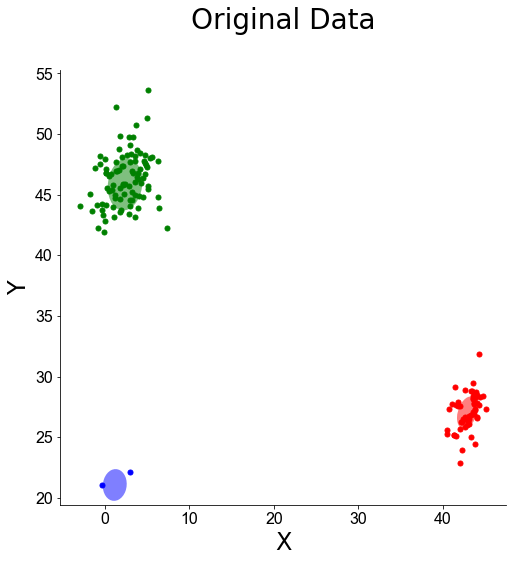

In [57]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [Mu[i][0],Mu[i][1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(Cov[i][0:2,0:2])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.plot(data_sample[i][:,0],data_sample[i][:,1], '.', c=color[i], markersize=sizeMean)
    ax.add_artist(ellip)
        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('Original Data', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 2. 데이터 random한 순서로 섞기

In [58]:
# data를 array로
y = np.empty([1, Ndim])
for i in range(NClasses):
    y = np.vstack((y,data_sample[i]))
    
y = np.delete(y, 0, axis=0)

# 데이터들에 클래스 할당하기
v_true = np.zeros((1)) 
for i,j in enumerate(r):
    v_true = np.hstack((v_true, np.repeat(i+1, j)))

v_true = np.array([v_true[1:]])
y_true = np.concatenate((y, v_true.T), axis=1)

# 데이터 섞기
np.random.shuffle(y_true)

y = y_true[:,0:-1]

print ('The data:')
print (y)

The data:
[[ 3.21431126e+00  4.45947671e+01]
 [ 3.68247776e+00  5.07425905e+01]
 [ 3.18997911e+00  4.52198535e+01]
 [-2.91536411e+00  4.40449450e+01]
 [ 6.80547314e-01  4.67135768e+01]
 [ 6.35222454e+00  4.38881268e+01]
 [ 3.95059093e+00  4.38665942e+01]
 [ 4.37878761e+01  2.72280677e+01]
 [ 4.36427827e+01  2.77255076e+01]
 [ 4.33225767e+01  2.50139959e+01]
 [ 4.07612440e+01  2.73051409e+01]
 [ 1.76206109e+00  4.35996858e+01]
 [ 3.52193459e+00  4.77454453e+01]
 [ 1.18114988e-01  4.41293911e+01]
 [ 4.27867821e+01  2.59710486e+01]
 [ 5.26451094e-01  4.53375690e+01]
 [ 4.20802114e+01  2.62680956e+01]
 [ 7.72846988e-02  4.68031090e+01]
 [ 4.37017028e+01  2.69506533e+01]
 [ 1.01279968e+00  4.58212622e+01]
 [ 4.55315590e+00  4.63837939e+01]
 [ 4.33948072e+01  2.88300660e+01]
 [ 5.01786255e+00  5.12840293e+01]
 [ 1.48831252e+00  4.69918133e+01]
 [ 7.32153510e+00  4.22623218e+01]
 [-6.70074252e-03  4.28342314e+01]
 [ 4.10298194e+01  2.77485731e+01]
 [ 4.29263964e+01  2.64026735e+01]
 [ 4.50954

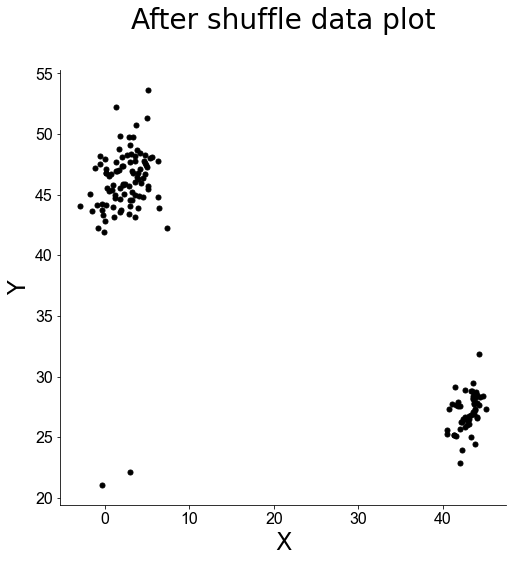

In [59]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('After shuffle data plot', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 3. E-step, M-step 정의

### mean, covariance matrix 초기화

In [60]:
# 처음 Mean과 Covariance 행렬을 random으로 만들어두고
# 초기 확률 w는 위에서 뽑은 class별 선택될 확률과 동일

initMu = np.empty([NClasses, Ndim])
initCov = np.empty([Ndim, Ndim, NClasses])

for j in range(NClasses):
    
    initMu[j,:] = np.random.uniform(0.0, 50.0, Ndim)
    sd = np.random.uniform(1.0,10.0)
    initCov[:,:,j] = makeSDmatrix(Ndim,sd)

a = np.ones(NClasses)
n = 1
p = len(a)
rd = np.random.gamma(np.repeat(a,n),n,p)
rd = np.divide(rd,np.repeat(np.sum(rd),p))
initW = rd

### E-step

In [61]:
def EStep(y, w, mu, cov):
    
    r_ij = np.zeros((y.shape[0], mu.shape[0]))

    for Object in range(y.shape[0]):
        r_ij_Sumj = np.zeros(mu.shape[0])
        
        for jClass in range(mu.shape[0]):
            r_ij_Sumj[jClass] = w[jClass] * sc.stats.multivariate_normal.pdf(y[Object,:], mu[jClass,:], cov[:,:,jClass])
        
        for jClass in range(r_ij_Sumj.shape[0]):
            r_ij[Object,jClass] =   r_ij_Sumj[jClass] / np.sum(r_ij_Sumj)
    
    return r_ij

### M-step

In [62]:
def MStep(r, y, mu, cov):
    
    N = y.shape[0]
    
    Allmu_j = np.zeros((N, mu.shape[0], mu.shape[1]))
    Allcov_j = np.zeros((N, cov.shape[0], cov.shape[1], cov.shape[2]))
    mu_j = np.zeros((mu.shape[0], mu.shape[1]))
    cov_j = np.zeros((cov.shape[0], cov.shape[1], cov.shape[2]))
    
    # weight 업데이트
    w_j = np.sum(r, axis=0) / N
    
    # mean : mu_j
    for Object in range(N):
        Allmu_j[Object,:,:]=np.asmatrix(r[Object,:]).T*y[Object,:]
    
    for j in range(cov.shape[2]):
        mu_j[j,:] = (np.sum(Allmu_j, axis=0)[j,:])/(np.sum(r, axis=0)[j])
        
    # covariance : cov_j
    for Object in range(N):
        for j in range(cov.shape[2]):
            Allcov_j[Object,:,:,j] = r[Object,j] *np.asmatrix(y[Object,:]-mu_j[j,:]).T*np.asmatrix(y[Object,:]-mu_j[j,:])
            
    for j in range(cov.shape[2]):
        cov_j[:,:,j] = (np.sum(Allcov_j, axis=0)[:,:,j])/(np.sum(r,axis=0)[j])
    
    return w_j,mu_j,cov_j

### 1번 실행해 보기

In [63]:
r_n = EStep(y, initW, initMu, initCov)
print ('r_n : ', r_n)
print ('r_n shape : ', r_n.shape)

r_n :  [[3.68825545e-176 1.00000000e+000 2.41761477e-028]
 [8.93452430e-216 1.00000000e+000 2.41043453e-028]
 [1.61200459e-180 1.00000000e+000 2.02682638e-028]
 [9.42265679e-236 1.00000000e+000 2.12031884e-039]
 [4.35295792e-216 1.00000000e+000 5.66517558e-033]
 [2.75561721e-143 1.00000000e+000 3.77125422e-023]
 [1.40287334e-164 1.00000000e+000 4.49909246e-027]
 [5.27380584e-015 8.02208329e-006 9.99991978e-001]
 [4.88844450e-014 3.84062221e-006 9.99996159e-001]
 [7.43443569e-016 4.19163871e-004 9.99580836e-001]
 [3.84392363e-005 3.82742362e-005 9.99923287e-001]
 [9.68421430e-184 1.00000000e+000 8.19126294e-031]
 [8.07962904e-195 1.00000000e+000 4.22837562e-028]
 [8.47822866e-204 1.00000000e+000 9.25834624e-034]
 [9.42026642e-013 1.03125574e-004 9.99896874e-001]
 [7.01161538e-208 1.00000000e+000 4.15756537e-033]
 [4.77899817e-010 9.09019756e-005 9.99909098e-001]
 [4.26122441e-223 1.00000000e+000 4.41942219e-034]
 [5.75509280e-015 1.31149523e-005 9.99986885e-001]
 [2.91121903e-206 1.0000

In [64]:
w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
print ('wn : \n',w_n)
print ('mu_n : \n',mu_n)
print ('cov_n : \n',cov_n.T)
print ('wn.shape : ',w_n.shape)
print ('mu_n.shape : ',mu_n.shape)
print ('cov_n.shape : ',cov_n.shape)

wn : 
 [4.52255808e-07 6.33649985e-01 3.66349563e-01]
mu_n : 
 [[40.81095988 27.16764443]
 [ 2.41515228 45.77559531]
 [42.93924518 27.12318929]]
cov_n : 
 [[[ 0.0531815   0.18932456]
  [ 0.18932456  0.85898333]]

 [[ 5.11794862  1.31620405]
  [ 1.31620405 17.57430143]]

 [[ 1.21044239  0.71079815]
  [ 0.71079815  2.31361742]]]
wn.shape :  (3,)
mu_n.shape :  (3, 2)
cov_n.shape :  (2, 2, 3)


## 4. EM Algorithm
- 수렴 조건 : 현재 log likelihood와 이전 log likelihood 차이가 10^(-5) 미만이면 stop

In [65]:
EMiteration = 2000

# starting values    
r_n = EStep(y, initW, initMu, initCov)
w_n,mu_n,cov_n = MStep(r_n, y, initMu, initCov)
    
logLH = -1000000000000
        
for i in range(EMiteration):
    # E step
    r_n = EStep(y, w_n, mu_n,cov_n)

    # M step
    w_n,mu_n,sigma_n = MStep(r_n, y, mu_n, cov_n)

    # log likelihood
    logLall = np.zeros((y.shape[0]))

    for Object in range(y.shape[0]):
        LH = np.zeros(NClasses)

        for jClass in range(NClasses):
            LH[jClass] = w_n[jClass] * sc.stats.multivariate_normal.pdf(y[Object,:], mu_n[jClass,:], cov_n[:,:,jClass])

        logLall[Object] = np.log(np.sum(LH))

    logL = np.sum(logLall)

    if logL > logLH:
        # 수렴조건을 둘 차이가 10^(-4) 미만일때로 설정
        if (logL-logLH<10**(-6)):
            print('둘 차이가 매우 적음')
            break
        else :
            logLH = logL
            print ('found larger: ', logLH)
            w_p = w_n
            mu_p = mu_n
            sigma_p = sigma_n
            r_p = r_n
print('final log likelihood : ', logLH)

found larger:  -751.3148533942614
found larger:  -751.3082234818914
found larger:  -751.2731308343818
found larger:  -751.0965877395004
found larger:  -750.3916314030369
found larger:  -748.907005139253
found larger:  -747.7224546550887
found larger:  -747.2855459214243
found larger:  -747.1265973312418
found larger:  -747.0688586409801
found larger:  -747.0513908397127
found larger:  -747.0462688824348
found larger:  -747.0446641610149
found larger:  -747.0441300423702
found larger:  -747.0439461142075
found larger:  -747.0438816693639
found larger:  -747.0438588829217
found larger:  -747.0438507855796
found larger:  -747.0438478998551
found larger:  -747.0438468697154
둘 차이가 매우 적음
final log likelihood :  -747.0438468697154


### EM algorithm 이후 예측된 class 분포

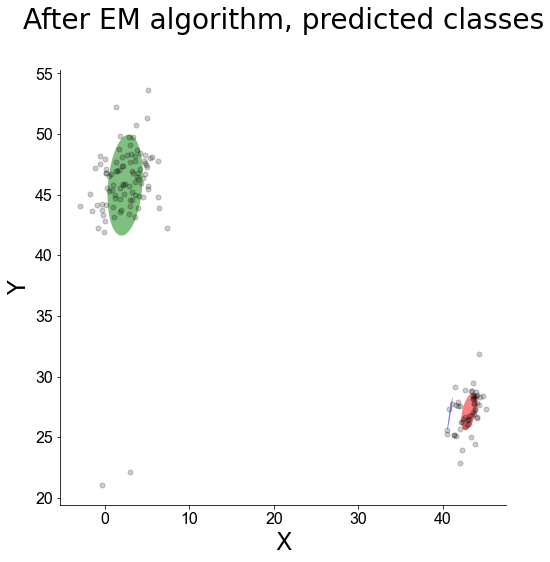

In [66]:
plotsize = 8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()

ax = fig.add_subplot(1,1,1)
ax.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean, alpha=0.2)
for i in range(NClasses):
      
    # the sd with ellipses
    # central point of the error ellipse
    pos = [mu_p[i,0],mu_p[i,1]]

    # for the angle we need the eigenvectors of the covariance matrix
    w,ve = np.linalg.eig(sigma_p[0:2,0:2,i])

    # We pick the largest eigen value
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]

    # we compute the angle towards the eigen vector with the largest eigen value
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))

    # Compute the width and height of the ellipse based on the eigen values (ie the length of the vectors)
    width, height = 2 * np.sqrt(w)

    # making the ellipse
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
             
    ax.add_artist(ellip)
        
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(text_size)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_ylabel('Y', **axis_font)
ax.set_xlabel('X', **axis_font)
ax.set_title('After EM algorithm, predicted classes', y=1.08, **Title_font)
ax.figure.set_size_inches(plotsize,plotsize)

plt.show()

## 5. 결과

### 시행 중에 class가 random 순서로 배정되어서 가장 정확도가 높은 순서로 r_p 정렬하기

In [67]:
a=list(range(NClasses))
permute = list(permutations(a,NClasses))
permute_=[]
acc_list=[]
permute_list=[]
r_list=[]
# 모든 permutation을 고려해 정확도 구하여서 가장 높은 정확도를 가지는 permutation 찾기
for i in range(len(permute)):
    
    Gorder = list(permute[i])
    permute_.append(Gorder)
    
    r_=[]
    reorder = r_p[:,Gorder]
    inf = np.argmax(reorder, axis=1)
    r_.append(inf+1)
    
    Clust=y_true[:,2]==inf+1
    now_acc=np.mean(Clust)
    acc_list=np.append(acc_list, now_acc)
    permute_list.append(list)
    r_list.append(r_)
acc=max(acc_list)
index=np.argmax(acc_list)
print('accuracy : ',acc)
print('가장 높은 정확도를 가지는 permutation : ', permute[index])
print('예측 class : \n ',r_list[index])

accuracy :  0.9533333333333334
가장 높은 정확도를 가지는 permutation :  (0, 1, 2)
예측 class : 
  [array([2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2,
       3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2,
       3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2], dtype=int64)]


### mean, 확률, Covariance matrix 정렬

In [68]:
order = list(permute[index])
mu_order=mu_p[order,:]
w_order=w_p[order]
sigma_order = sigma_p[:,:,order]

### 예측값과 실제값 비교

In [69]:
print ('예측 : class 별 선택될 확률: ',w_order)
print ('실제 : class 별 선택될 확률 ',alpha)

예측 : class 별 선택될 확률:  [0.02714704 0.63333333 0.33951963]
실제 : class 별 선택될 확률  [0.02348295 0.61392504 0.36259201]


In [70]:
for i in range(0,NClasses):
    print (['예측 : class'+ str(i+1)+'별 means'], mu_order[i,:])
print ('------------------')
for i in range(0,NClasses):
    print (['실제 : class'+ str(i+1)+'별 means'], Mu[i])

['예측 : class1별 means'] [40.82344854 26.93725977]
['예측 : class2별 means'] [ 2.39536533 45.78679359]
['예측 : class3별 means'] [43.10753113 27.13456277]
------------------
['실제 : class1별 means'] [ 1.17094751 21.0584417 ]
['실제 : class2별 means'] [ 2.38867362 45.85519544]
['실제 : class3별 means'] [42.87002816 27.02341149]


In [71]:
for i in range(0,NClasses):
    print (['예측 : class'+ str(i+1)+'의 variances' ])
    print (sigma_order[:,:,i])
print ('------------------')
for i in range(0,NClasses):
    print (['실제 : class'+ str(i+1)+'의 variances'])
    print (Cov[i])

['예측 : class1의 variances']
[[0.10061263 0.41557355]
 [0.41557355 1.84278153]]
['예측 : class2의 variances']
[[ 4.33692158  1.76030358]
 [ 1.76030358 17.33173497]]
['예측 : class3의 variances']
[[0.91284305 0.70361167]
 [0.70361167 2.36006274]]
------------------
['실제 : class1의 variances']
[[1.99652722 0.11699115]
 [0.11699115 1.71298774]]
['실제 : class2의 variances']
[[4.19954781 0.46361535]
 [0.46361535 4.63318621]]
['실제 : class3의 variances']
[[1.47073602 0.53292803]
 [0.53292803 1.77324883]]


### 실제 class

In [72]:
y_true[:,2]

array([2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 2., 2., 2., 3., 2., 3.,
       2., 3., 2., 2., 3., 2., 2., 2., 2., 3., 3., 3., 3., 2., 3., 2., 2.,
       3., 2., 3., 2., 3., 2., 3., 2., 1., 2., 3., 3., 2., 3., 2., 3., 3.,
       2., 2., 2., 2., 3., 2., 2., 3., 2., 3., 2., 2., 2., 2., 2., 3., 3.,
       2., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2.,
       3., 3., 2., 3., 3., 3., 3., 2., 2., 3., 2., 2., 3., 2., 2., 2., 3.,
       2., 1., 2., 2., 2., 2., 2., 2., 3., 2., 2., 2., 3., 2., 2., 3., 3.,
       2., 3., 2., 3., 3., 3., 2., 3., 2., 2., 3., 2., 2., 2., 2., 3., 2.,
       2., 2., 2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 2.])

### 예측 class

In [73]:
r_list[index]

[array([2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3,
        2, 2, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2,
        3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
        3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2,
        3, 3, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
        3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 2,
        2, 2, 3, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2], dtype=int64)]

### 정확도

In [74]:
print('정확도 : ', acc*100)

정확도 :  95.33333333333334


## 원래 class, 예측 class 비교

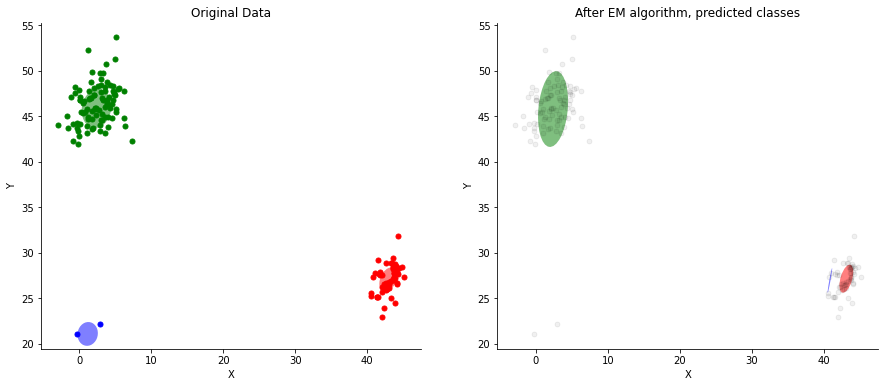

In [75]:
fig = plt.figure(figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
plotsize=8
sizeMean = 10
text_size = 16
axis_font = {'size':'24'}
Title_font = {'size':'28'}
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(NClasses):
    pos = [Mu[i][0],Mu[i][1]]
    w,ve = np.linalg.eig(Cov[i][0:2,0:2])
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))
    width, height = 2 * np.sqrt(w)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
    ax1.plot(data_sample[i][:,0],data_sample[i][:,1], '.', c=color[i], markersize=sizeMean)
    ax1.add_artist(ellip)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
ax1.set_title('Original Data')


for i in range(NClasses):
    pos = [mu_p[i][0],mu_p[i][1]]
    w,ve = np.linalg.eig(sigma_p[0:2,0:2,i])
    order = w.argsort()[::-1]
    w = w[order]
    ve = ve[:,order]
    theta = np.degrees(np.arctan(ve[1,0]/ve[0,0]))
    width, height = 2 * np.sqrt(w)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta)
    ellip.set_alpha(0.5)
    ellip.set_facecolor(color[i])
    ax2.plot(y[:,0],y[:,1], 'k.', markersize=sizeMean, alpha=0.02)
    ax2.add_artist(ellip)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.set_ylabel('Y')
ax2.set_xlabel('X')
ax2.set_title('After EM algorithm, predicted classes')
plt.show()